In [3]:
#基本套件和模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['DFKai-sb']
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [4]:
#載入資料
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


資料為kaggle上的歐洲信用卡交易資料，其中v1-v27都經過主成分分析，Amount是金額，Class被盜刷與否。

In [5]:
df.drop('Time',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

只有class為類別變數，其他均為連續值

In [6]:
df.isnull().sum().sum()

0

無遺漏值

In [7]:
#觀察目標變數-是否被盜刷(Class)
size=df['Class'].value_counts()
pct =df['Class'].value_counts(normalize=True).round(3)
pd.DataFrame(zip(size,pct),columns=['次數','百分比'],index=['No','Yes'])

,次數,百分比
No,284315,0.998
Yes,492,0.002


總資料有約28萬筆，但只有492筆有問題，而在這裏的目標是找出這492筆涉嫌詐欺的。

<AxesSubplot:>

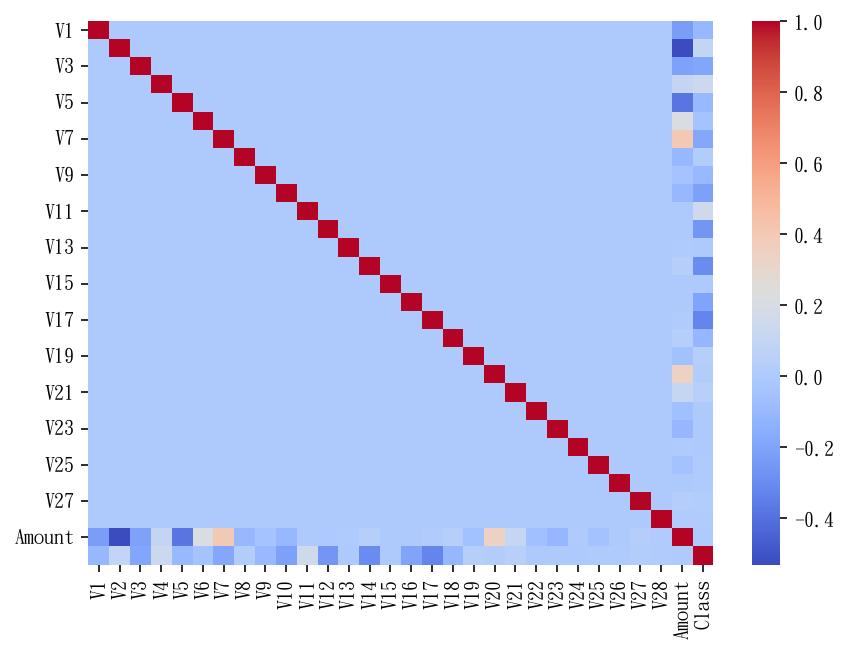

In [8]:
#查看相關係數
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='coolwarm')

只有v7和Amount以及v20和Amount相關係數較高

In [9]:
#檢視所有連續變數和目標變數的關係
df.corrwith(df['Class']).round(2)

V1       -0.10
V2        0.09
V3       -0.19
V4        0.13
V5       -0.09
V6       -0.04
V7       -0.19
V8        0.02
V9       -0.10
V10      -0.22
V11       0.15
V12      -0.26
V13      -0.00
V14      -0.30
V15      -0.00
V16      -0.20
V17      -0.33
V18      -0.11
V19       0.03
V20       0.02
V21       0.04
V22       0.00
V23      -0.00
V24      -0.01
V25       0.00
V26       0.00
V27       0.02
V28       0.01
Amount    0.01
Class     1.00
dtype: float64

相關係數都不高

In [10]:
#比較目標變數與金額的關係
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


詐欺金額沒有超過2125.87，且有75%落在0~105.89之間

<AxesSubplot:xlabel='Class', ylabel='Amount'>

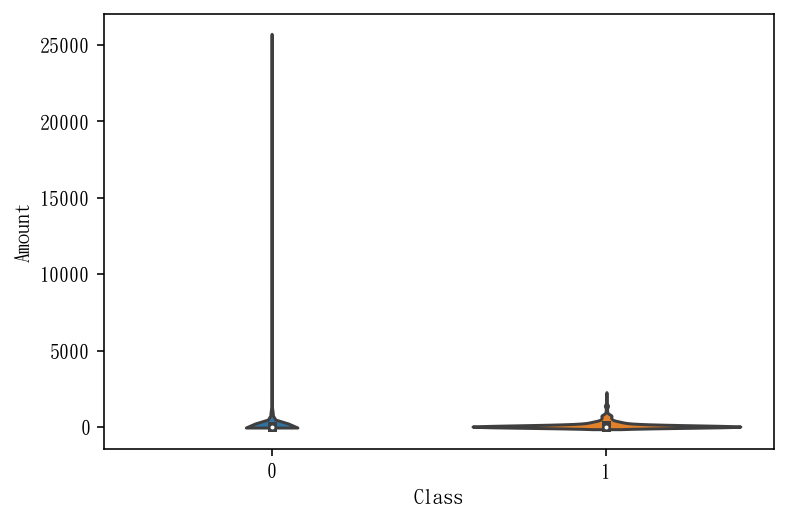

In [11]:
#作圖
sns.violinplot(x='Class',y='Amount',data=df)

詐欺類的普遍金額較低，可能是害怕引起信用卡公司注意，故盜刷以小額為主。

In [12]:
#定義與切割
x = df.drop('Class',axis=1)
y = df['Class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [13]:
#檢視基礎預測結果
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report#正確率、混亂矩陣、綜合報告
dmy = DummyClassifier(strategy='most_frequent')
dmy.fit(x_train,y_train)
dmy.score(x_train,y_train)
y_pred = dmy.predict(x_test)
print('整體正確率:',accuracy_score(y_test,y_pred))
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

整體正確率: 0.9982444436641972
混亂矩陣
       預測1  預測2
實際1  85293    0
實際2    150    0
綜合報告
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85293
           1       0.00      0.00      0.00       150

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score

In [15]:
#將每個預測模型和組合器投入使用
models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),BaggingClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
model_results={}
for model in models:
    model_pl=make_pipeline(StandardScaler(),model)
    model_pl.fit(x_train,y_train)
    y_pred = model_pl.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred,pos_label=1)
    model_results[model.__class__.__name__] = [score,recall]
    print(f'模型名稱{model.__class__.__name__:-^50}')
    print(f'混亂矩陣\n',pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
    print(f'正確率:{score:.3f},召回率:{recall:.3f}\n')

模型名稱----------------LogisticRegression----------------
混亂矩陣
        預測1  預測2
實際1  85281   12
實際2     75   75
正確率:0.999,召回率:0.500

模型名稱---------------KNeighborsClassifier---------------
混亂矩陣
        預測1  預測2
實際1  85289    4
實際2     45  105
正確率:0.999,召回率:0.700

模型名稱--------------DecisionTreeClassifier--------------
混亂矩陣
        預測1  預測2
實際1  85248   45
實際2     49  101
正確率:0.999,召回率:0.673

模型名稱-----------------------SVC------------------------
混亂矩陣
        預測1  預測2
實際1  85289    4
實際2     59   91
正確率:0.999,召回率:0.607

模型名稱----------------BaggingClassifier-----------------
混亂矩陣
        預測1  預測2
實際1  85285    8
實際2     41  109
正確率:0.999,召回率:0.727

模型名稱--------------RandomForestClassifier--------------
混亂矩陣
        預測1  預測2
實際1  85289    4
實際2     38  112
正確率:1.000,召回率:0.747

模型名稱----------------AdaBoostClassifier----------------
混亂矩陣
        預測1  預測2
實際1  85283   10
實際2     53   97
正確率:0.999,召回率:0.647

模型名稱------------GradientBoostingClassifier------------
混亂矩陣
        預測1  預測2
實際1  85276   

In [16]:
#整理並排序
df_orig = pd.DataFrame(model_results.values(),index=model_results.keys(),columns=['prec','recall'])
df_orig.sort_values(by='recall',ascending=False)

,prec,recall
RandomForestClassifier,0.999508,0.746667
XGBClassifier,0.999497,0.740000
BaggingClassifier,0.999427,0.726667
KNeighborsClassifier,0.999427,0.700000
DecisionTreeClassifier,0.998900,0.673333
AdaBoostClassifier,0.999263,0.646667
SVC,0.999263,0.606667
GradientBoostingClassifier,0.999064,0.580000
LogisticRegression,0.998982,0.500000


從這張表可以看出RandomForestClassifier在召回率的表現最佳約為0.76

In [17]:
#嘗試解決目標類別不均衡--權重
models = [LogisticRegression(class_weight='balanced'),DecisionTreeClassifier(class_weight='balanced'),SVC(class_weight='balanced'),RandomForestClassifier(class_weight='balanced'),XGBClassifier(class_weight='balanced')]
model_results={}
for model in models:
    model_pl=make_pipeline(StandardScaler(),model)
    model_pl.fit(x_train,y_train)
    y_pred = model_pl.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred,pos_label=1)
    model_results[model.__class__.__name__] = [score,recall]
    print(f'模型名稱{model.__class__.__name__:-^50}')
    print(f'混亂矩陣\n',pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
    print(f'正確率:{score:.3f},召回率:{recall:.3f}\n')

模型名稱----------------LogisticRegression----------------
混亂矩陣
        預測1   預測2
實際1  83628  1665
實際2     19   131
正確率:0.980,召回率:0.873

模型名稱--------------DecisionTreeClassifier--------------
混亂矩陣
        預測1  預測2
實際1  85272   21
實際2     46  104
正確率:0.999,召回率:0.693

模型名稱-----------------------SVC------------------------
混亂矩陣
        預測1  預測2
實際1  85076  217
實際2     46  104
正確率:0.997,召回率:0.693

模型名稱--------------RandomForestClassifier--------------
混亂矩陣
        預測1  預測2
實際1  85289    4
實際2     46  104
正確率:0.999,召回率:0.693

[22:42:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

模型名稱------------------XGBClassifier-------------------
混亂矩陣
        預測1  預測2
實際1  85289    4
實際2     39  111
正確率:0.999,召回率:0.740



In [18]:
#整理並排序
df_weight = pd.DataFrame(model_results.values(),index=model_results.keys(),columns=['prec','recall'])
df_weight.sort_values(by='recall',ascending=False)

,prec,recall
LogisticRegression,0.980291,0.873333
XGBClassifier,0.999497,0.740000
DecisionTreeClassifier,0.999216,0.693333
SVC,0.996922,0.693333
RandomForestClassifier,0.999415,0.693333


整體表現都有所提升，羅吉斯回歸召集率更上升到0.87

In [19]:
#嘗試解決目標類別不均衡--向下取樣
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),BaggingClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
model_results={}
for model in models:
    model_pl=make_pipeline(StandardScaler(),RandomUnderSampler(),model)
    model_pl.fit(x_train,y_train)
    y_pred = model_pl.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred,pos_label=1)
    model_results[model.__class__.__name__] = [score,recall]
    print(f'模型名稱{model.__class__.__name__:-^50}')
    print(f'混亂矩陣\n',pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
    print(f'正確率:{score:.3f},召回率:{recall:.3f}\n')

模型名稱----------------LogisticRegression----------------
混亂矩陣
        預測1   預測2
實際1  82855  2438
實際2     16   134
正確率:0.971,召回率:0.893

模型名稱---------------KNeighborsClassifier---------------
混亂矩陣
        預測1   預測2
實際1  83946  1347
實際2     21   129
正確率:0.984,召回率:0.860

模型名稱--------------DecisionTreeClassifier--------------
混亂矩陣
        預測1   預測2
實際1  76880  8413
實際2     22   128
正確率:0.901,召回率:0.853

模型名稱-----------------------SVC------------------------
混亂矩陣
        預測1   預測2
實際1  84057  1236
實際2     25   125
正確率:0.985,召回率:0.833

模型名稱----------------BaggingClassifier-----------------
混亂矩陣
        預測1   預測2
實際1  81542  3751
實際2     23   127
正確率:0.956,召回率:0.847

模型名稱--------------RandomForestClassifier--------------
混亂矩陣
        預測1   預測2
實際1  83362  1931
實際2     22   128
正確率:0.977,召回率:0.853

模型名稱----------------AdaBoostClassifier----------------
混亂矩陣
        預測1   預測2
實際1  81491  3802
實際2     17   133
正確率:0.955,召回率:0.887

模型名稱------------GradientBoostingClassifier------------
混亂矩陣
        預

In [20]:
df_down = pd.DataFrame(model_results.values(),index=model_results.keys(),columns=['prec','recall'])
df_down.sort_values(by='recall',ascending=False)

,prec,recall
LogisticRegression,0.971279,0.893333
AdaBoostClassifier,0.955304,0.886667
XGBClassifier,0.969067,0.880000
GradientBoostingClassifier,0.966879,0.873333
KNeighborsClassifier,0.983989,0.860000
DecisionTreeClassifier,0.901279,0.853333
RandomForestClassifier,0.977143,0.853333
BaggingClassifier,0.955830,0.846667
SVC,0.985242,0.833333


最高的是羅吉斯回歸，其召回率上升至0.893，其召回率比權重法略高。

In [21]:
#嘗試解決目標類別不均衡--向上取樣
from imblearn.over_sampling import SMOTE
models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),BaggingClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
model_results={}
for model in models:
    model_pl=make_pipeline(StandardScaler(),SMOTE(),model)
    model_pl.fit(x_train,y_train)
    y_pred = model_pl.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred,pos_label=1)
    model_results[model.__class__.__name__] = [score,recall]
    print(f'模型名稱{model.__class__.__name__:-^50}')
    print(f'混亂矩陣\n',pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
    print(f'正確率:{score:.3f},召回率:{recall:.3f}\n')

模型名稱----------------LogisticRegression----------------
混亂矩陣
        預測1   預測2
實際1  83498  1795
實際2     20   130
正確率:0.979,召回率:0.867

模型名稱---------------KNeighborsClassifier---------------
混亂矩陣
        預測1  預測2
實際1  85169  124
實際2     28  122
正確率:0.998,召回率:0.813

模型名稱--------------DecisionTreeClassifier--------------
混亂矩陣
        預測1  預測2
實際1  85130  163
實際2     43  107
正確率:0.998,召回率:0.713

模型名稱-----------------------SVC------------------------
混亂矩陣
        預測1   預測2
實際1  84175  1118
實際2     26   124
正確率:0.987,召回率:0.827

模型名稱----------------BaggingClassifier-----------------
混亂矩陣
        預測1  預測2
實際1  85236   57
實際2     40  110
正確率:0.999,召回率:0.733

模型名稱--------------RandomForestClassifier--------------
混亂矩陣
        預測1  預測2
實際1  85283   10
實際2     39  111
正確率:0.999,召回率:0.740

模型名稱----------------AdaBoostClassifier----------------
混亂矩陣
        預測1   預測2
實際1  83463  1830
實際2     23   127
正確率:0.978,召回率:0.847

模型名稱------------GradientBoostingClassifier------------
混亂矩陣
        預測1  預測2
實際1 

In [22]:
df_up = pd.DataFrame(model_results.values(),index=model_results.keys(),columns=['prec','recall'])
df_up.sort_values(by='recall',ascending=False)

,prec,recall
LogisticRegression,0.978758,0.866667
AdaBoostClassifier,0.978313,0.846667
GradientBoostingClassifier,0.988928,0.846667
SVC,0.986611,0.826667
KNeighborsClassifier,0.998221,0.813333
XGBClassifier,0.999204,0.766667
RandomForestClassifier,0.999427,0.740000
BaggingClassifier,0.998865,0.733333
DecisionTreeClassifier,0.997589,0.713333


最高的是LogisticRegression，其召回率為0.867，其召回率比權重法略高，但低於向下取樣。

In [23]:
#比較所有方法的召回率
df_recall = pd.concat([df_orig,df_weight,df_down,df_up],axis=1,keys=['沒處理','權重法','向下取樣','向上取樣'])
df_recall.xs('recall',level=1,axis=1).style.highlight_max(axis=1)

,沒處理,權重法,向下取樣,向上取樣
LogisticRegression,0.500000,0.873333,0.893333,0.866667
KNeighborsClassifier,0.700000,nan,0.860000,0.813333
DecisionTreeClassifier,0.673333,0.693333,0.853333,0.713333
SVC,0.606667,0.693333,0.833333,0.826667
BaggingClassifier,0.726667,nan,0.846667,0.733333
RandomForestClassifier,0.746667,0.693333,0.853333,0.740000
AdaBoostClassifier,0.646667,nan,0.886667,0.846667
GradientBoostingClassifier,0.580000,nan,0.873333,0.846667
XGBClassifier,0.740000,0.740000,0.880000,0.766667


從上述表格可以得知，向下取樣的方法優於兩者。

AUC分數:0.9578281531505126


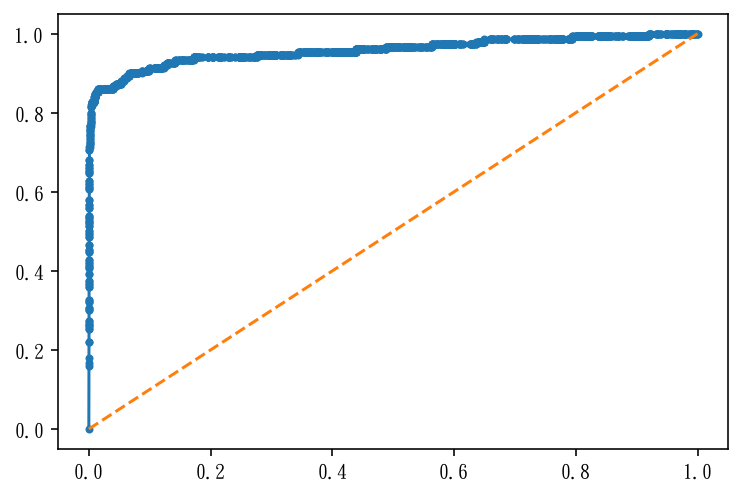

In [26]:
#繪製ROC圖()
from sklearn.metrics import roc_curve,roc_auc_score
model_pl=make_pipeline(StandardScaler(),RandomUnderSampler(),LogisticRegression()) 
model_pl.fit(x_train,y_train)
y_pred_porba = model_pl.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_porba)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],ls='--')
print(f'AUC分數:{roc_auc_score(y_test,y_pred_porba)}')

AUC分數:0.958代表分類表現相當傑出

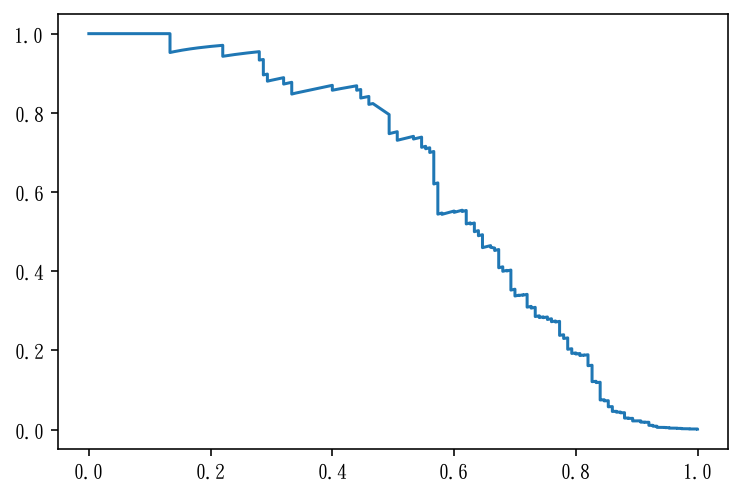

In [25]:
#繪製PRC圖
from sklearn.metrics import precision_recall_curve
model_pl=make_pipeline(StandardScaler(),RandomUnderSampler(),LogisticRegression()) 
model_pl.fit(x_train,y_train)
y_pred_porba = model_pl.predict_proba(x_test)[:,1]
prec,recall,thres = precision_recall_curve(y_test,y_pred_porba)
plt.plot(recall,prec)

結論:信用偵測的目的在抓出盜刷者，所以需要進行調整來提高召回率以預測盜刷的發生。而在這裡可以採用向下採樣的方法，並使用羅吉斯迴歸進行預測，召回率可達0.893。